In [89]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [90]:
df = pd.read_csv('sample1_1980.csv')
nineties = pd.read_csv('sample1_1990.csv')
two_thousands = pd.read_csv('sample1_2000.csv')


In [49]:
df.head()

,Unnamed: 0,Year,G,Pos,AST,BLK,Player,FG,STL,PTS,TRB,O_Index,D_Index,Overall_Index,PPG,ASTPG,RPG,BLKPG,STLPG,FGPG
0,1407,1983,79,SG,216,8,Phil Smith,175,44,454,130,4.791139,0.855696,5.646835,5.746835,2.734177,1.645570,0.101266,0.556962,2.215190
1,1736,1984,68,PG,193,8,Lorenzo Romar,161,55,393,93,4.850000,0.825000,5.675000,5.779412,2.838235,1.367647,0.117647,0.808824,2.367647
2,1314,1983,82,PF,115,148,Rick Mahorn,376,86,898,779,8.404878,4.656098,13.060976,10.951220,1.402439,9.500000,1.804878,1.048780,4.585366
3,3629,1989,4,SG,2,0,Pete Myers,6,3,14,10,2.700000,1.225000,3.925000,3.500000,0.500000,2.500000,0.000000,0.750000,1.500000
4,1094,1983,80,C,376,74,Alvan Adams,477,114,1135,548,11.467500,3.445000,14.912500,14.187500,4.700000,6.850000,0.925000,1.425000,5.962500


In [50]:
# list of strings 
lst = df.Year 
two = df.Player
three = df.Overall_Index
four = df.O_Index
five = df.D_Index
# list of int 
lst2 = [11, 22, 33, 44, 55, 66, 77] 
  
# Calling DataFrame constructor after zipping 
# both lists, with columns specified 
df2 = pd.DataFrame(list(zip(lst, two, three, four, five)), 
               columns =['Year', 'Player', 'Overall_index', 'O_index', 'D_index']) 
df2


,Year,Player,Overall_index,O_index,D_index
0,1983,Phil Smith,5.646835,4.791139,0.855696
1,1984,Lorenzo Romar,5.675000,4.850000,0.825000
2,1983,Rick Mahorn,13.060976,8.404878,4.656098
3,1989,Pete Myers,3.925000,2.700000,1.225000
4,1983,Alvan Adams,14.912500,11.467500,3.445000
5,1985,Quinn Buckner,2.897333,2.173333,0.724000
6,1987,Walter Berry,1.900000,1.414286,0.485714
7,1987,Ron Rowan,1.514286,1.285714,0.228571
8,1988,James Donaldson,9.620988,5.359259,4.261728
9,1987,Eddie Johnson,16.438272,14.469136,1.969136


In [52]:
df2.dtypes

Year               int64
Player            object
Overall_index    float64
O_index          float64
D_index          float64
dtype: object

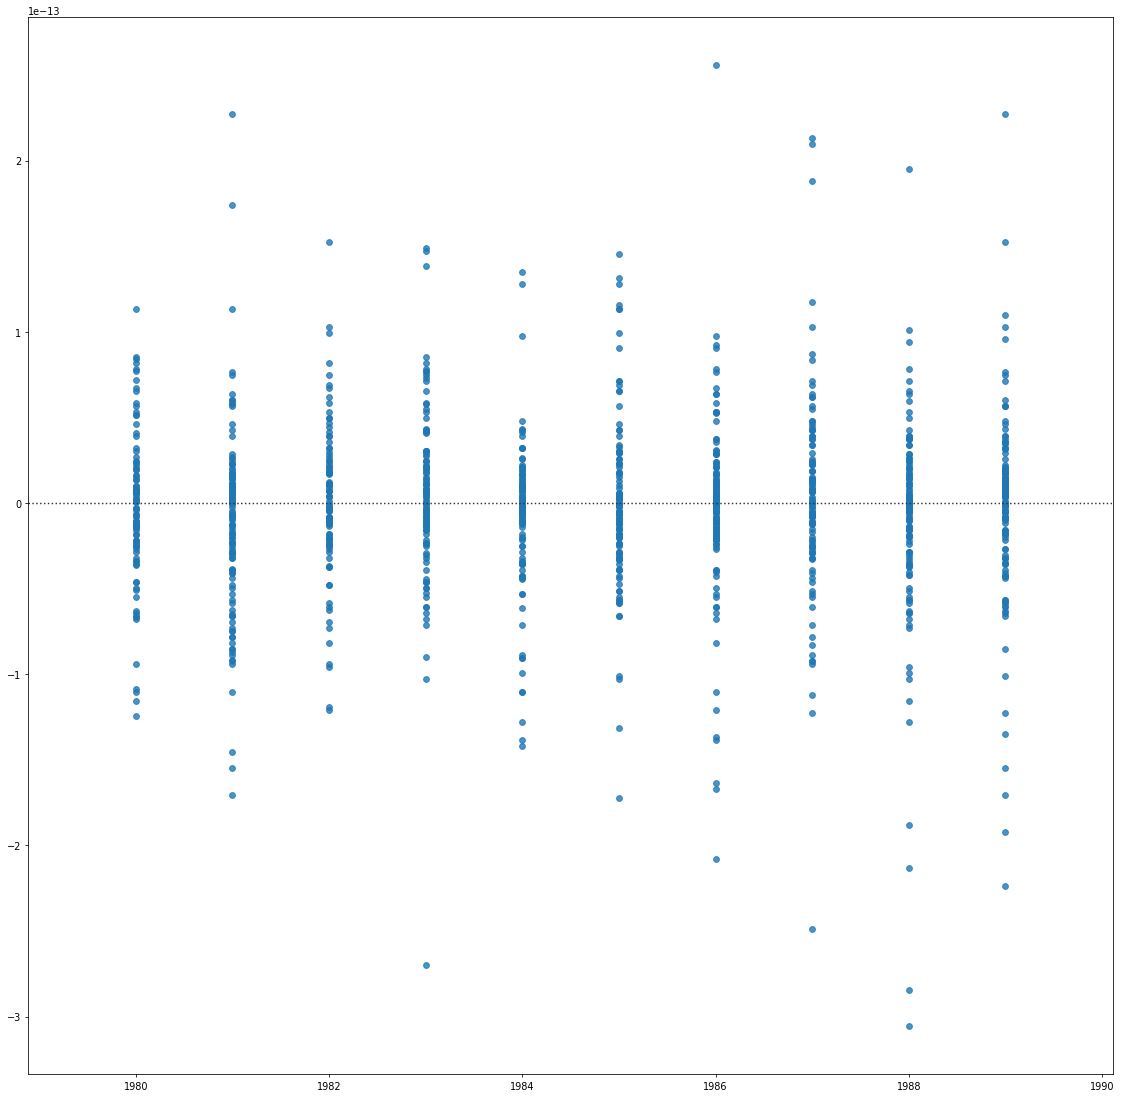

In [33]:
import seaborn 
import matplotlib.pyplot as plt
import numpy
w = 20
h = 20
d = 70
plt.figure(figsize=(w, h), dpi=d)
x = numpy.array([lst])
y = numpy.array([three])

seaborn.residplot(x, y, label=None)

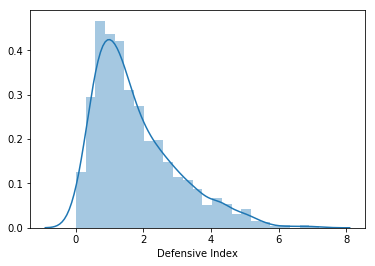

The defensive min is 0.0, the defensive max is 7.2, the defensive mean is 1.77


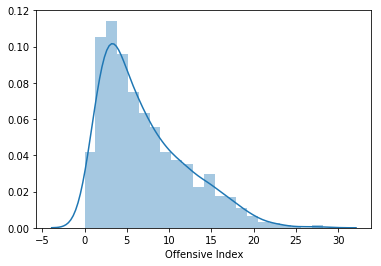

The offensive min is 0.0, the offensive max is 28.22, the offensive mean is 7.03


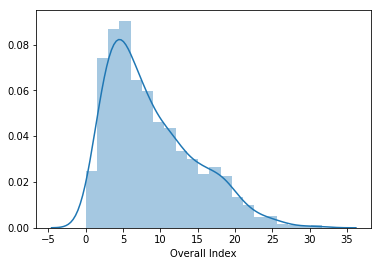

The overall min is 0.0, the overall max is 31.64, the overall mean is 8.79


In [99]:
#1980s data

import seaborn as sns

import matplotlib.pyplot as plt

#set each column to a list/variable 
defensive_indexes = [] 
defensive_indexes = df2.D_index.tolist()
#min, max and mean of defensive index
from numpy  import array
a = array( defensive_indexes )

d_min = a.min().round(2)
d_max = a.max().round(2)
d_mean = a.mean().round(2)



offensive_indexes = []
offensive_indexes = df2.O_index.tolist()



b = array( offensive_indexes )

o_min = b.min().round(2)
o_max = b.max().round(2)
o_mean = b.mean().round(2)


Overall_indexes = []
Overall_indexes = df2.Overall_index.tolist()

c = array( Overall_indexes )
ov_min = c.min().round(2)
ov_max = c.max().round(2)
ov_mean = c.mean().round(2)

#plot distribution of defensive index of sample
sns.distplot(defensive_indexes, axlabel="Defensive Index")
plt.show()
print(f"The defensive min is {d_min}, the defensive max is {d_max}, the defensive mean is {d_mean}")

#plot distribution of offensive index of sample
sns.distplot(offensive_indexes, axlabel="Offensive Index")
plt.show()

print(f"The offensive min is {o_min}, the offensive max is {o_max}, the offensive mean is {o_mean}")

#plot distribution of overall index of sample
sns.distplot(Overall_indexes, axlabel="Overall Index")
plt.show()
print(f"The overall min is {ov_min}, the overall max is {ov_max}, the overall mean is {ov_mean}")




In [92]:
#create data frame for variables from the 1990s

# list of strings 
years1 = nineties.Year 
players1 = nineties.Player
ov1 = nineties.Overall_Index
o1 = nineties.O_Index
d1 = nineties.D_Index
# list of int 
#lst2 = [11, 22, 33, 44, 55, 66, 77] 
  
# Calling DataFrame constructor after zipping 
# both lists, with columns specified 
nine_sorted = pd.DataFrame(list(zip(years1, players1, ov1, o1, d1)), 
               columns =['Year', 'Player', 'Overall_index', 'O_index', 'D_index']) 

nine_sorted.head(5)

,Year,Player,Overall_index,O_index,D_index
0,1992.0,John Morton,3.550000,2.775000,0.775000
1,1991.0,Tim Perry,4.743478,3.217391,1.526087
2,1998.0,Lee Mayberry,5.127848,4.265823,0.862025
3,1991.0,Danny Ainge,10.231250,8.921250,1.310000
4,1991.0,Rolando Blackman,17.067500,15.457500,1.610000


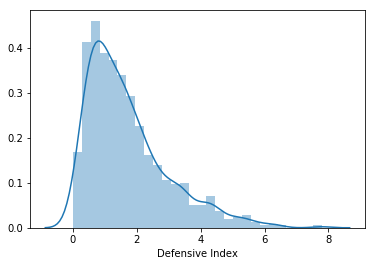

The defensive min is 0.0, the defensive max is 7.8, the defensive mean is 1.7


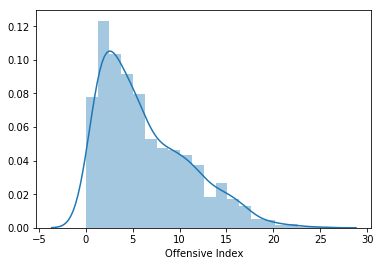

The offensive min is 0.0, the offensive max is 25.17, the offensive mean is 6.28


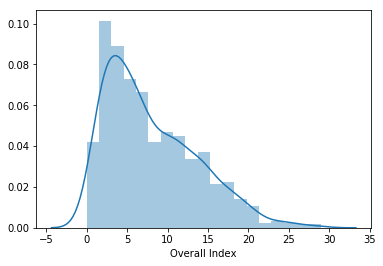

The overall min is 0.0, the overall max is 28.93, the overall mean is 7.98


In [93]:
#set columns of data frame to a list

#set each column to a list/variable 
defensive_indexes1 = [] 
defensive_indexes1 = nine_sorted.D_index.tolist()
#min, max and mean of defensive index and create a numpy array
from numpy  import array
a1 = array( defensive_indexes1 )

d_min1 = a1.min().round(2)
d_max1 = a1.max().round(2)
d_mean1 = a1.mean().round(2)


#set each column to a list/variable 
offensive_indexes1 = []
offensive_indexes1 = nine_sorted.O_index.tolist()


#min, max and mean of defensive index and create a numpy array
b1 = array( offensive_indexes1 )

o_min1 = b1.min().round(2)
o_max1 = b1.max().round(2)
o_mean1 = b1.mean().round(2)

#set each column to a list/variable 
Overall_indexes1 = []
Overall_indexes1 = nine_sorted.Overall_index.tolist()

#min, max and mean of defensive index and create a numpy array
c1 = array( Overall_indexes1 )
ov_min1 = c1.min().round(2)
ov_max1 = c1.max().round(2)
ov_mean1 = c1.mean().round(2)

#plot distribution of defensive index of sample
sns.distplot(defensive_indexes1, axlabel="Defensive Index")
plt.show()
print(f"The defensive min is {d_min1}, the defensive max is {d_max1}, the defensive mean is {d_mean1}")

#plot distribution of offensive index of sample
sns.distplot(offensive_indexes1, axlabel="Offensive Index")
plt.show()

print(f"The offensive min is {o_min1}, the offensive max is {o_max1}, the offensive mean is {o_mean1}")

#plot distribution of overall index of sample
sns.distplot(Overall_indexes1, axlabel="Overall Index")
plt.show()
print(f"The overall min is {ov_min1}, the overall max is {ov_max1}, the overall mean is {ov_mean1}")


In [94]:
#create data frame for variables from the 1990s

# list of strings 
years2 = two_thousands.Year 
players2 = two_thousands.Player
ov2 = two_thousands.Overall_Index
o2 = two_thousands.O_Index
d2 = two_thousands.D_Index
# list of int 
#lst2 = [11, 22, 33, 44, 55, 66, 77] 
  
# Calling DataFrame constructor after zipping 
# both lists, with columns specified 
two_thousand_sorted = pd.DataFrame(list(zip(years2, players2, ov2, o2, d2)), 
               columns =['Year', 'Player', 'Overall_index', 'O_index', 'D_index']) 

two_thousand_sorted.head(5)

,Year,Player,Overall_index,O_index,D_index
0,2004.0,Lonny Baxter,4.414286,3.264286,1.150000
1,2003.0,Jermaine Jackson,2.524528,1.952830,0.571698
2,2008.0,Chuck Hayes,5.121519,2.473418,2.648101
3,2010.0,Jamal Crawford,15.151899,13.856962,1.294937
4,2010.0,Steve Novak,1.859259,1.564815,0.294444


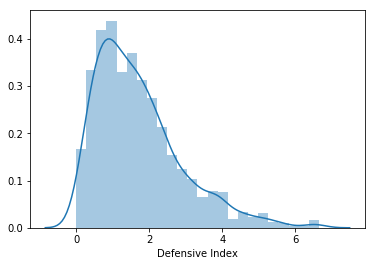

The defensive min is 0.0, the defensive max is 6.65, the defensive mean is 1.71


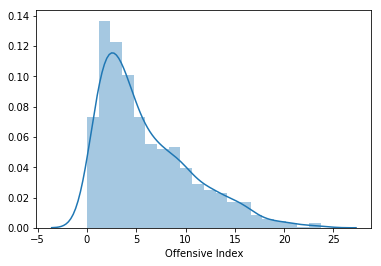

The offensive min is 0.0, the offensive max is 23.71, the offensive mean is 5.98


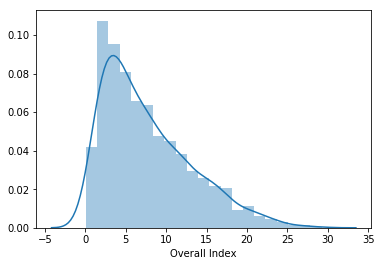

The overall min is 0.07, the overall max is 29.24, the overall mean is 7.68


In [95]:
#set columns of data frame to a list

#set each column to a list/variable 
defensive_indexes2 = [] 
defensive_indexes2 = two_thousand_sorted.D_index.tolist()
#min, max and mean of defensive index and create a numpy array
from numpy  import array
a2 = array( defensive_indexes2 )

d_min2 = a2.min().round(2)
d_max2 = a2.max().round(2)
d_mean2 = a2.mean().round(2)


#set each column to a list/variable 
offensive_indexes2 = []
offensive_indexes2 = two_thousand_sorted.O_index.tolist()


#min, max and mean of defensive index and create a numpy array
b2 = array( offensive_indexes2 )

o_min2 = b2.min().round(2)
o_max2 = b2.max().round(2)
o_mean2 = b2.mean().round(2)

#set each column to a list/variable 
Overall_indexes2 = []
Overall_indexes2 = two_thousand_sorted.Overall_index.tolist()

#min, max and mean of defensive index and create a numpy array
c2 = array( Overall_indexes2 )
ov_min2 = c2.min().round(2)
ov_max2 = c2.max().round(2)
ov_mean2 = c2.mean().round(2)

#plot distribution of defensive index of sample
sns.distplot(defensive_indexes2, axlabel="Defensive Index")
plt.show()
print(f"The defensive min is {d_min2}, the defensive max is {d_max2}, the defensive mean is {d_mean2}")

#plot distribution of offensive index of sample
sns.distplot(offensive_indexes2, axlabel="Offensive Index")
plt.show()

print(f"The offensive min is {o_min2}, the offensive max is {o_max2}, the offensive mean is {o_mean2}")

#plot distribution of overall index of sample
sns.distplot(Overall_indexes2, axlabel="Overall Index")
plt.show()
print(f"The overall min is {ov_min2}, the overall max is {ov_max2}, the overall mean is {ov_mean2}")
